In [15]:
import pandas as pd
%matplotlib inline
# Loading in the data
pulls = pd.read_csv('datasets/pulls.csv')
pull_files =  pd.read_csv('datasets/pull_files.csv')
display(pulls.head(), pull_files.head())


,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


In [16]:
# Convert to datetime
pulls.date = pd.to_datetime(pulls.date, utc=True)
pulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 3 columns):
pid     6200 non-null int64
user    6200 non-null object
date    6200 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 145.4+ KB


In [17]:
# Merge 
print(pull_files.shape)
data = pulls.merge(pull_files, on='pid')
display(data.shape)
data.head()

(85588, 2)


(85588, 4)

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java


month_year
2011-12     83
2012-1      69
2012-10    116
2012-11    135
2012-12    145
Name: date, dtype: int64

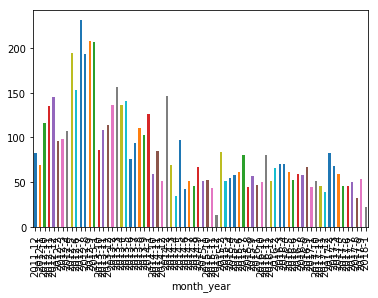

In [18]:
# Month/year column to count pull requests per month
pulls['month_year'] = pulls.date.apply(lambda x: str(x.year) + '-' + str(x.month))
counts = pulls.groupby('month_year').date.count()
display(counts.head())
counts.plot.bar()

user
0xmohit          1
193s             4
2m               3
4.00E+06         2
AlexeyIvanov8    1
Name: date, dtype: int64

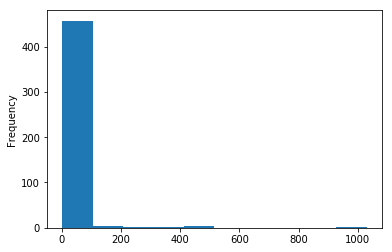

In [19]:
# See who's submitting the most
by_user = pulls.groupby('user').date.count()
display(by_user.head())
by_user.plot.hist()
# So this says most contributors barely contributed

In [20]:
# Identify the last 10 pull requests
last_10 = pulls.nlargest(10, 'date')
display(last_10)
# Join the two data sets and identify unique
joined_pr = last_10.merge(pull_files, on='pid')
files = set(joined_pr.file)

files

,pid,user,date,month_year
0,163314316,hrhino,2018-01-16 23:29:16+00:00,2018-1
1,163061502,joroKr21,2018-01-15 23:44:52+00:00,2018-1
2,163057333,mkeskells,2018-01-15 23:05:06+00:00,2018-1
3,162985594,lrytz,2018-01-15 15:52:39+00:00,2018-1
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00,2018-1
5,162765232,howtonotwin,2018-01-13 04:37:17+00:00,2018-1
6,162643301,hrhino,2018-01-12 14:29:49+00:00,2018-1
7,162256029,mkeskells,2018-01-10 23:20:03+00:00,2018-1
8,162197834,SethTisue,2018-01-10 18:31:25+00:00,2018-1
9,162011899,joroKr21,2018-01-10 00:45:57+00:00,2018-1


{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

In [21]:
# Random file supposedly being worked on. Who is working on it?
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data.file==file]
# Count the number of changes made by each developer
author_counts = file_pr.groupby('user').file.count()

# Print the top 3 developers
author_counts.nlargest(3)

user
xeno-by     11
retronym     5
soc          4
Name: file, dtype: int64

In [22]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files.file==file]

# Merge the obtained results with the pulls DataFrame
joined_pr = file_pr.merge(pulls, on='pid')

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date').user)

#90% sure just including this line is better than this whole cell but w/e
##users_last_10 = set(file_pr.nlargest(10, 'date').user)

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

In [23]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Find pulls that changed target file, combine with dataset
file_pr = pull_files[pull_files.file==file]
joined_pr = file_pr.merge(pulls, on='pid')

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date').user)

users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

(715, 4)


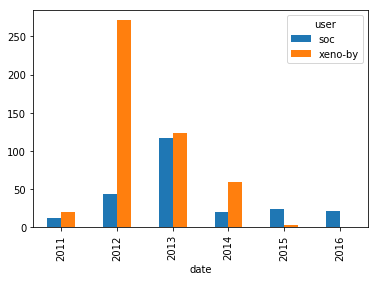

In [24]:
# Two target devs
authors = ['xeno-by', 'soc']

by_author = pulls[pulls.user.isin(authors)]
print(by_author.shape)
#16999,4
##they wanted just the pulls, not # of changes
###
# Count the number of pull requests submitted each year
counts = by_author.groupby(['user', by_author.date.dt.year]).agg({'pid': 'count'}).reset_index()

#make it readable
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)
counts_wide.plot.bar()

In [25]:
#diff between tables
display(grouped.head())
by_file_wide.head()

,user,date,pid
0,soc,2012,2
1,soc,2013,2
2,xeno-by,2012,10
3,xeno-by,2014,1


user,soc,xeno-by
date,,
2012,2,10
2013,2,0
2014,0,1
